![SETI](https://www.petfinder.my/images/cuteness_meter.jpg)  

# Problem Statement
* Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. You might expect pets with attractive photos to generate more interest and be adopted faster.
* With the help of data science, we will accurately determine a pet photo’s appeal to give these rescue animals a higher chance of loving homes.
* Currently, PetFinder.my uses a basic Cuteness Meter to rank pet photos. It analyzes picture composition and other factors compared to the performance of thousands of pet profiles.

## Why this competition?
As evident from the problem statement, this competition presents an interesting challenge for a good cause.  
Also (if successful) the solution can be adapted into tools that will can shelters and rescuers around the world to improve the appeal of their pet profiles, automatically enhancing photo quality and consequently helping animals find a suitable hjome much faster.

## Expected Outcome
Given a photo a pet animal and some basic information about the photo as dense features, we should be able to estimate the 'pawpularity' score of the pet.

## Data Description
Image data is stored in a jpg image format in training folder and the dense features and target scores are mentioned in the `train.csv` file where the Id of each row corresponds to an unique image in the training folder.
There are also some basic info on the photograph as dense features on the `train.csv` file.

## Grading Metric
Submissions are evaluated on **RMSE** between the predicted value and the observed target.

## Problem Category
From the data and objective its is evident that this is a **Regression Problem** in the Computer Vision domain.

**If you found this notebook useful and use parts of it in your work, please don't forget to show your appreciation by upvoting this kernel. That keeps me motivated and inspires me to write and share these public kernels.** 😊

In [1]:
!nvidia-smi
from google.colab import files
files.upload()

!pip install --ignore-installed --upgrade kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c petfinder-pawpularity-score
!unzip petfinder-pawpularity-score.zip
!kaggle datasets download -d abhishek/pawpular-folds
!unzip pawpular-folds.zip
!kaggle datasets download -d phalanx/petfinder2-cropped-dataset
!unzip petfinder2-cropped-dataset.zip
!kaggle datasets download -d mithilsalunkhe/pseudo-without-duplicates-cats-and-dogs
!mkdir pseudo
!unzip /content/pseudo-without-duplicates-cats-and-dogs.zip -d pseudo


Thu Dec 16 06:36:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Saving kaggle.json to kaggle.json
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 149 kB 28.9 MB/s 
     |████████████████████████████████| 247 kB 52.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 138 kB 75.4 MB/s 
     |████████████████████████████████| 78 kB 9.4 MB/s 
     |████████████████████████████████| 61 kB 10.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=4fa0b7f4e253877deba1a28c6048e7905881e3433b521de13048665eb4fd7b30
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but yo

Streaming output truncated to the last 5000 lines.
  inflating: pseudo/Pseudo Dogs/e92b33580-1.jpg  
  inflating: pseudo/Pseudo Dogs/e92b33580-2.jpg  
  inflating: pseudo/Pseudo Dogs/e92b33580-3.jpg  
  inflating: pseudo/Pseudo Dogs/e92d3d4cf-1.jpg  
  inflating: pseudo/Pseudo Dogs/e92d3d4cf-2.jpg  
  inflating: pseudo/Pseudo Dogs/e92d3d4cf-3.jpg  
  inflating: pseudo/Pseudo Dogs/e92d3d4cf-4.jpg  
  inflating: pseudo/Pseudo Dogs/e92ed29c2-1.jpg  
  inflating: pseudo/Pseudo Dogs/e92ed29c2-2.jpg  
  inflating: pseudo/Pseudo Dogs/e92ed29c2-3.jpg  
  inflating: pseudo/Pseudo Dogs/e932a94c6-1.jpg  
  inflating: pseudo/Pseudo Dogs/e932a94c6-2.jpg  
  inflating: pseudo/Pseudo Dogs/e932a94c6-3.jpg  
  inflating: pseudo/Pseudo Dogs/e935ae1d8-1.jpg  
  inflating: pseudo/Pseudo Dogs/e935ae1d8-2.jpg  
  inflating: pseudo/Pseudo Dogs/e935ae1d8-3.jpg  
  inflating: pseudo/Pseudo Dogs/e935ae1d8-4.jpg  
  inflating: pseudo/Pseudo Dogs/e936b0102-1.jpg  
  inflating: pseudo/Pseudo Dogs/e936f5f63-1.jpg  

# About This Notebook:-
* This notebook tried to demonstrate the use of Transfer learning using Pytorch and how to combine image features with dense features for various tasks.
* We use a vanilla **vit_large_patch32_384** model for extracting image embeddings and concatenate them with the dense features on the last layer on a NN.
* Refer [this link](https://www.kaggle.com/c/petfinder-pawpularity-score/discussion/275094) for description regarding using this particular methodology.
* This notebook only covers the training part. Inference can be found in the notebook link below.

Inference Notebook:- https://www.kaggle.com/manabendrarout/transformers-classifier-method-starter-infer  

<p style='color: #fc0362; font-family: Segoe UI; font-size: 1.5em; font-weight: 300; font-size: 24px'>TLDR:- We treat this problem as a classification problem by scaling all targets between [0, 1] and use cross entropy loss as loss-function. It is known that transformer based models are performing better than classic CNN based models on this dataset.</p>

# Get GPU Info

In [2]:
!nvidia-smi

Thu Dec 16 06:39:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installations

In [3]:
!pip install -qq timm
!pip install -qq albumentations==1.0.3
!pip install -qq grad-cam
!pip install -qq ttach

     |████████████████████████████████| 376 kB 14.6 MB/s 
     |████████████████████████████████| 98 kB 6.9 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
     |████████████████████████████████| 1.8 MB 11.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Imports

In [1]:
# Asthetics
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# General
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd
import numpy as np
import os
import random
import gc
import cv2
import glob
gc.enable()
pd.set_option('display.max_columns', None)

# Visialisation
import matplotlib.pyplot as plt
%matplotlib inline

# Image Aug
import albumentations
from albumentations.pytorch.transforms import ToTensorV2

# Deep Learning
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, OneCycleLR, CosineAnnealingLR
import torch
import torchvision
import timm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

#Metrics
from sklearn.metrics import mean_squared_error

# Random Seed Initialize
RANDOM_SEED = 42

def seed_everything(seed=RANDOM_SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything()

# Device Optimization
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(f'Using device: {device}')

Using device: cuda


In [ ]:
import warnings
import torch_xla
import torch_xla.debug.metrics as met
import torch_xla.distributed.data_parallel as dp
import torch_xla.distributed.parallel_loader as pl
import torch_xla.utils.utils as xu
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.test.test_utils as test_utils
import warnings

warnings.filterwarnings("ignore")

In [2]:
csv_dir = '../input/petfinder-pawpularity-score'
train_dir = "/content/train"
test_dir = '/content/test'

train_file_path = '/content/train_5folds.csv'
sample_sub_file_path = "/content/sample_submission.csv"

print(f'Train file: {train_file_path}')
print(f'Train file: {sample_sub_file_path}')

Train file: /content/train_5folds.csv
Train file: /content/sample_submission.csv


In [3]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(sample_sub_file_path)

In [4]:
def return_filpath(name, folder=train_dir):
    path = os.path.join(folder, f'{name}.jpg')
    return path

In [5]:
train_df['image_path'] = train_df['Id'].apply(lambda x: return_filpath(x))
test_df['image_path'] = test_df['Id'].apply(lambda x: return_filpath(x, folder=test_dir))

In [6]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,kfold,image_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,0,/content/train/0007de18844b0dbbb5e1f607da0606e...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,2,/content/train/0009c66b9439883ba2750fb825e1d7d...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,0,/content/train/0013fd999caf9a3efe1352ca1b0d937...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,3,/content/train/0018df346ac9c1d8413cfcc888ca824...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,4,/content/train/001dc955e10590d3ca4673f034feeef...


In [7]:
test_df.head()

,Id,Pawpularity,image_path
0,4128bae22183829d2b5fea10effdb0c3,67.75,/content/test/4128bae22183829d2b5fea10effdb0c3...
1,43a2262d7738e3d420d453815151079e,59.15,/content/test/43a2262d7738e3d420d453815151079e...
2,4e429cead1848a298432a0acad014c9d,20.02,/content/test/4e429cead1848a298432a0acad014c9d...
3,80bc3ccafcc51b66303c2c263aa38486,94.53,/content/test/80bc3ccafcc51b66303c2c263aa38486...
4,8f49844c382931444e68dffbe20228f4,89.82,/content/test/8f49844c382931444e68dffbe20228f4...


In [8]:
target = ['Pawpularity']
not_features = ['Id', 'kfold', 'image_path', 'Pawpularity']
cols = list(train_df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


# CFG

In [9]:
TRAIN_FOLDS = [0,1,2,3,4]

In [10]:
params = {
    'model': 'swin_base_patch4_window7_224',
    'dense_features': features,
    'pretrained': True,
    'inp_channels': 3,
    'im_size': 224,
    'device': xm.xla_device(),
    'lr': 1e-5* xm.xrt_world_size(),
    'weight_decay': 1e-6,
    'batch_size': 8,
    'num_workers' : 0,
    'epochs': 5,
    'out_features': 1,
    'dropout': 0.2,
    'num_fold': 5,
    'mixup': True,
    'mixup_alpha': 1.0,
    'scheduler_name': 'CosineAnnealingWarmRestarts',
    'T_0': 5,
    'T_max': 5,
    'T_mult': 1,
    'min_lr': 1e-7,
    'max_lr': 1e-4
}

# Augmentations

There a well known concept called **image augmentations** in CNN. What augmentation generally does is, it artificially increases the dataset size by subtly modifying the existing images to create new ones (while training). One added advantage of this is:- The model becomes more generalized and focuses to finding features and representations rather than completely overfitting to the training data. It also sometimes helps the model train on more noisy data as compared to conventional methods.  

Example:-  
![](https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png)  
Source:- https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png

One of the most popular image augmentation libraries is **Albumentations**. It has an extensive list of image augmentations, the full list can be found in their [documentation](https://albumentations.ai/docs/).  

*Tip:- Not all augmentations are applicable in all conditions. It really depends on the dataset and the problem. Example:- If your task is to identify if a person is standing or sleeping, applying a rotational augmentation can make the model worse.*  

With that in mind, let's define our augmentations:-

## 1. Train Augmentations

In [11]:
def get_train_transforms(DIM = params['im_size']):
    return albumentations.Compose(
        [
            albumentations.Resize(DIM,DIM),
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            albumentations.HorizontalFlip(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.Rotate(limit=180, p=0.7),
            albumentations.ShiftScaleRotate(
                shift_limit = 0.1, scale_limit=0.1, rotate_limit=45, p=0.5
            ),
            
            ToTensorV2(p=1.0),
        ]
    )

## 2. Mixup

In [12]:
def mixup_data(x, z, y, params):
	if params['mixup_alpha'] > 0:
		lam = np.random.beta(
			params['mixup_alpha'], params['mixup_alpha']
		)
	else:
		lam = 1

	batch_size = x.size()[0]
	if params['device'].type == 'cuda':
		index = torch.randperm(batch_size).cuda()
	else:
		index = torch.randperm(batch_size)

	mixed_x = lam * x + (1 - lam) * x[index, :]
	mixed_z = lam * z + (1 - lam) * z[index, :]
	y_a, y_b = y, y[index]
	return mixed_x, mixed_z, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
	return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


def rand_bbox1(size, lamb):
	""" Generate random bounding box
	Args:
		- size: [width, breadth] of the bounding box
		- lamb: (lambda) cut ratio parameter, sampled from Beta distribution
	Returns:
		- Bounding box
	"""
	W = size[0]
	H = size[1]
	cut_rat = np.sqrt(1. - lamb)
	cut_w = np.int(W * cut_rat)
	cut_h = np.int(H * cut_rat)

	# uniform
	cx = np.random.randint(W)
	cy = np.random.randint(H)

	bbx1 = np.clip(cx - cut_w // 2, 0, W)
	bby1 = np.clip(cy - cut_h // 2, 0, H)
	bbx2 = np.clip(cx + cut_w // 2, 0, W)
	bby2 = np.clip(cy + cut_h // 2, 0, H)

	return bbx1, bby1, bbx2, bby2


def cutmix(image_batch, image_batch_labels, beta=params["mixup_alpha"]):
	""" Generate a CutMix augmented image from a batch
	Args:
		- image_batch: a batch of input images
		- image_batch_labels: labels corresponding to the image batch
		- beta: a parameter of Beta distribution.
	Returns:
		- CutMix image batch, updated labels
	"""
	# generate mixed sample
	lam = np.random.beta(beta, beta)
	rand_index = np.random.permutation(len(image_batch))
	target_a = image_batch_labels
	target_b = image_batch_labels[rand_index]
	bbx1, bby1, bbx2, bby2 = rand_bbox1(image_batch[0].shape, lam)
	image_batch_updated = image_batch.clone()
	image_batch_updated[:, bbx1:bbx2, bby1:bby2, :] = image_batch[rand_index, bbx1:bbx2, bby1:bby2, :]

	# adjust lambda to exactly match pixel ratio
	lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image_batch.shape[1] * image_batch.shape[2]))
	label = target_a * lam + target_b * (1. - lam)

	return image_batch_updated, label


def rand_bbox(size, lam, center=False, attcen=None):
	if len(size) == 4:
		W = size[2]
		H = size[3]
	elif len(size) == 3:
		W = size[1]
		H = size[2]
	elif len(size) == 2:
		W = size[0]
		H = size[1]
	else:
		raise Exception

	cut_rat = np.sqrt(1. - lam)
	cut_w = np.int(W * cut_rat)
	cut_h = np.int(H * cut_rat)

	if attcen is None:
		# uniform
		cx = 0
		cy = 0
		if W > 0 and H > 0:
			cx = np.random.randint(W)
			cy = np.random.randint(H)
		if center:
			cx = int(W / 2)
			cy = int(H / 2)
	else:
		cx = attcen[0]
		cy = attcen[1]

	bbx1 = np.clip(cx - cut_w // 2, 0, W)
	bby1 = np.clip(cy - cut_h // 2, 0, H)
	bbx2 = np.clip(cx + cut_w // 2, 0, W)
	bby2 = np.clip(cy + cut_h // 2, 0, H)

	return bbx1, bby1, bbx2, bby2


def get_bbox(imgsize=(224, 224), beta=1.0):
	r = np.random.rand(1)
	lam = np.random.beta(beta, beta)
	bbx1, bby1, bbx2, bby2 = rand_bbox(imgsize, lam)

	return [bbx1, bby1, bbx2, bby2]
def get_spm(input, target, model):
	imgsize = (384, 384)
	bs = input.size(0)
	with torch.no_grad():
		output, fms = model(input)
		clsw = model.fc
		weight = clsw.weight.data
		bias = clsw.bias.data
		weight = weight.view(weight.size(0), weight.size(1), 1, 1)
		fms = F.relu(fms)
		poolfea = F.adaptive_avg_pool2d(fms, (1, 1));
		print("here")
		clslogit = F.softmax(clsw.forward(poolfea))
		clslogit = clslogit.type(torch.LongTensor)
		target = target.type(torch.LongTensor)

		out = F.conv2d(fms, weight, bias=bias)
		print("here")

		outmaps = []
		for i in range(bs):
			evimap = out[i, target[i]]
			outmaps.append(evimap)

		outmaps = torch.stack(outmaps)
		if imgsize is not None:
			outmaps = outmaps.view(outmaps.size(0), 1, outmaps.size(1), outmaps.size(2))
			outmaps = F.interpolate(outmaps, imgsize, mode='bilinear', align_corners=False)

		outmaps = outmaps.squeeze()

		for i in range(bs):
			outmaps[i] -= outmaps[i].min()
			outmaps[i] /= outmaps[i].sum()

	return outmaps


def snapmix(input, target, alpha=5, model=None):
	r = np.random.rand(1)
	lam_a = torch.ones(input.size(0))
	lam_b = 1 - lam_a
	target_b = target.clone()

	if True:
		wfmaps= get_spm(input, target, model)
		bs = input.size(0)
		lam = np.random.beta(alpha, alpha)
		lam1 = np.random.beta(alpha, alpha)
		rand_index = torch.randperm(bs).cuda()
		wfmaps_b = wfmaps[rand_index, :, :]
		target_b = target[rand_index]

		same_label = target == target_b
		bbx1, bby1, bbx2, bby2 = rand_bbox(input.size(), lam)
		bbx1_1, bby1_1, bbx2_1, bby2_1 = rand_bbox(input.size(), lam1)

		area = (bby2 - bby1) * (bbx2 - bbx1)
		area1 = (bby2_1 - bby1_1) * (bbx2_1 - bbx1_1)

		if area1 > 0 and area > 0:
			ncont = input[rand_index, :, bbx1_1:bbx2_1, bby1_1:bby2_1].clone()
			ncont = F.interpolate(ncont, size=(bbx2 - bbx1, bby2 - bby1), mode='bilinear', align_corners=True)
			input[:, :, bbx1:bbx2, bby1:bby2] = ncont
			lam_a = 1 - wfmaps[:, bbx1:bbx2, bby1:bby2].sum(2).sum(1) / (wfmaps.sum(2).sum(1) + 1e-8)
			lam_b = wfmaps_b[:, bbx1_1:bbx2_1, bby1_1:bby2_1].sum(2).sum(1) / (wfmaps_b.sum(2).sum(1) + 1e-8)
			tmp = lam_a.clone()
			lam_a[same_label] += lam_b[same_label]
			lam_b[same_label] += tmp[same_label]
			lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (input.size()[-1] * input.size()[-2]))
			lam_a[torch.isnan(lam_a)] = lam
			lam_b[torch.isnan(lam_b)] = 1 - lam

	return input, target, target_b, lam_a.cuda(), lam_b.cuda()



## 3. Valid Augmentations

In [13]:
def get_valid_transforms(DIM = params['im_size']):
    return albumentations.Compose(
        [
          albumentations.Resize(DIM,DIM),
          albumentations.Normalize(
              mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225],
          ),
          ToTensorV2(p=1.0)
        ]
    )

# Dataset

In [14]:
class CuteDataset(Dataset):
	def __init__(self, images_filepaths, dense_features, targets, transform=None):
		self.images_filepaths = images_filepaths
		self.dense_features = dense_features
		self.targets = targets
		self.transform = transform

	def __len__(self):
		return len(self.images_filepaths)

	def __getitem__(self, idx):
		image_filepath = self.images_filepaths[idx]
		image = cv2.imread(image_filepath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

		if self.transform is not None:
			image = self.transform(image=image)['image']

		dense = self.dense_features[idx, :]
		label = torch.tensor(self.targets[idx]).float()
		return image, dense, label


class CuteDatasetPseudo(Dataset):
	def __init__(self, images_filepaths, transform=None):
		self.images_filepaths = images_filepaths

		self.transform = transform

	def __len__(self):
		return len(self.images_filepaths)

	def __getitem__(self, idx):
		image_filepath = self.images_filepaths[idx]
		image = cv2.imread(image_filepath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	
		if self.transform is not None:
			image = self.transform(image=image)['image']

		return image

## 1. Visualize Some Examples

In [15]:
X_train = train_df['image_path']
X_train_dense = train_df[params['dense_features']]
y_train = train_df['Pawpularity']
train_dataset = CuteDataset(
    images_filepaths=X_train.values,
    dense_features=X_train_dense.values,
    targets=y_train.values,
    transform=get_train_transforms()
)

In [16]:
def show_image(train_dataset=train_dataset, inline=4):
    plt.figure(figsize=(20,10))
    for i in range(inline):
        rand = random.randint(0, len(train_dataset))
        image, dense, label = train_dataset[rand]
        plt.subplot(1, inline, i%inline +1)
        plt.axis('off')
        plt.imshow(image.permute(2, 1, 0))
        plt.title(f'Pawpularity: {label}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

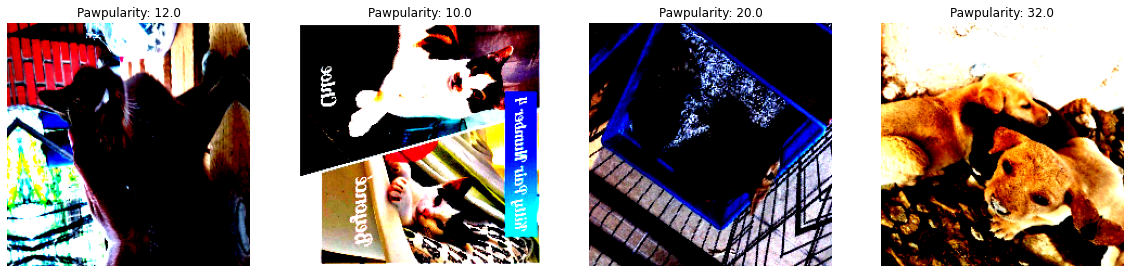

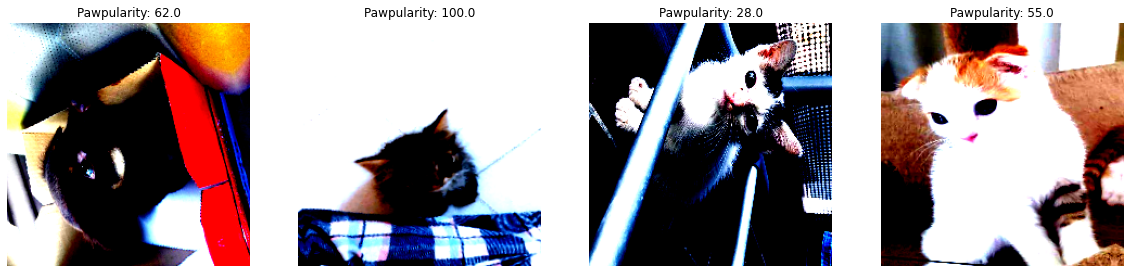

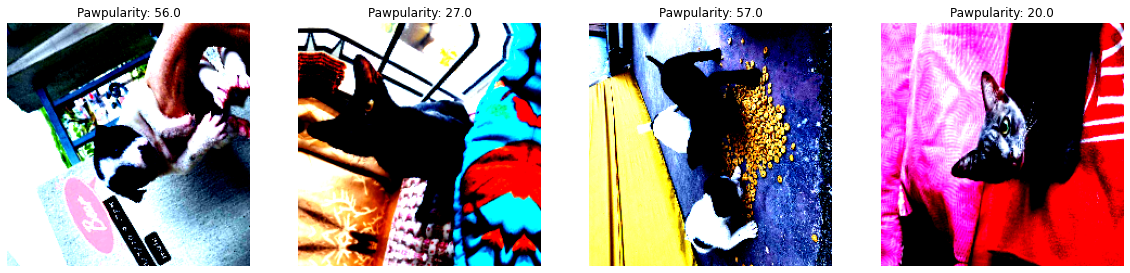

In [17]:
for i in range(3):
    show_image(inline=4)

In [18]:
del X_train, X_train_dense, y_train, train_dataset

# Metrics

In [19]:
def usr_rmse_score(output, target):
    y_pred = torch.sigmoid(output).cpu()
    y_pred = y_pred.detach().numpy()*100
    target = target.cpu()*100
    
    return mean_squared_error(target, y_pred, squared=False)

In [20]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"],
                    float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

# Scheduler

Scheduler is essentially an function that changes our learning rate over epochs/steps. But why do we need to do that?
1. The first reason is that our network may become stuck in either saddle points or local minima, and the low learning rate may not be sufficient to break out of the area and descend into areas of the loss landscape with lower loss.
2. Secondly, our model and optimizer may be very sensitive to our initial learning rate choice. If we make a poor initial choice in learning rate, our model may be stuck from the very start.

Instead, we can use Schedulers and specifically Cyclical Learning Rates(CLR) to oscillate our learning rate between upper and lower bounds, enabling us to:
* Have more freedom in our initial learning rate choices.
* Break out of saddle points and local minima.

In practice, using CLRs leads to far fewer learning rate tuning experiments along with near identical accuracy to exhaustive hyperparameter tuning.

In [21]:
def get_scheduler(optimizer, scheduler_params=params):
    if scheduler_params['scheduler_name'] == 'CosineAnnealingWarmRestarts':
        scheduler = CosineAnnealingWarmRestarts(
            optimizer,
            T_0=scheduler_params['T_0'],
            eta_min=scheduler_params['min_lr'],
            last_epoch=-1
        )
    elif scheduler_params['scheduler_name'] == 'OneCycleLR':
        scheduler = OneCycleLR(
            optimizer,
            max_lr=scheduler_params['max_lr'],
            steps_per_epoch=int(((scheduler_params['num_fold']-1) * train_df.shape[0]) / (scheduler_params['num_fold'] * scheduler_params['batch_size'])) + 1,
            epochs=scheduler_params['epochs'],
        )

    elif scheduler_params['scheduler_name'] == 'CosineAnnealingLR':
        scheduler = CosineAnnealingLR(
            optimizer,
            T_max=scheduler_params['T_max'],
            eta_min=scheduler_params['min_lr'],
            last_epoch=-1
        )
    return scheduler

# CNN Model

We will inherit from the nn.Module class to define our model. This is a easy as well as effective way of defining the model as it allows very granular control over the complete NN. We are not using the full capability of it here since it is a starter model, but practicing similar definitions will help if/when you decide to play around a little more with the NN layers and functions.  

Also we are using timm for instancing a pre-trained model.  
The complete list of Pytorch pre-trained image models through timm can be found [here](https://rwightman.github.io/pytorch-image-models/)  

In [22]:
class PetNet(nn.Module):
	def __init__(self, model_name=params['model'], out_features=params['out_features'],
	             inp_channels=params['inp_channels'],
	             pretrained=params['pretrained'], num_dense=len(params['dense_features'])):
		super().__init__()
		self.model = timm.create_model(model_name, pretrained=pretrained, in_chans=inp_channels)
		n_features = self.model.head.in_features
		self.model.head = nn.Linear(n_features, 128)
		self.fc = nn.Sequential(
			nn.Linear(128, 64),
			nn.ReLU(),
			nn.Linear(64, out_features)
		)
		self.dropout = nn.Dropout(params['dropout'])

	def forward(self, image):
		embeddings = self.model(image)
		x = self.dropout(embeddings)
		x = torch.cat([x], dim=1)
		output = self.fc(x)
		return output


# Train and Validation Functions

## 1. Train Function

In [23]:


T1 = 100
T2 = 700
af = 3


def alpha_weight(step):
	if step < T1:
		return 0.0
	elif step > T2:
		return af
	else:
		return ((step - T1) / (T2 - T1)) * af


def train_fn(train_loader, model, criterion, optimizer, epoch, params, pseudo_loader, scheduler=None):
	metric_monitor = MetricMonitor()
	model.train()
	stream = tqdm(train_loader)
	stream_pseudo = tqdm(pseudo_loader)
	step = 100
	for x, images in enumerate(stream_pseudo):
		images = images.to(params['device'], non_blocking=True)
		model.eval()
		output_unlabeled = model(images)
		model.train()
		output = model(images)
		unlabeled_loss = criterion(output, output_unlabeled)
		xm.optimizer_step(optimizer)

		if scheduler is not None:
			scheduler.step()

		optimizer.zero_grad()
		stream.set_description(f"Loss {unlabeled_loss.item()}")
		if x % 200 == 0:
			xm.master_print(unlabeled_loss);xm.master_print(f"output of the model when in train {output[5].sigmoid()} eval model output {output_unlabeled[5].sigmoid()}")
		if x % 4000 == 0:
			for i, (images, dense, target) in enumerate(stream, start=1):
				if params['mixup']:
					images, dense, target_a, target_b, lam = mixup_data(images, dense, target.view(-1, 1), params)
					images = images.to(params['device'], dtype=torch.float)
					dense = dense.to(params['device'], dtype=torch.float)
					target_a = target_a.to(params['device'], dtype=torch.float)
					target_b = target_b.to(params['device'], dtype=torch.float)
				else:
					images = images.to(params['device'], non_blocking=True)
					dense = dense.to(params['device'], non_blocking=True)
					target = target.to(params['device'], non_blocking=True).float().view(-1, 1)

				output = model(images)

				if params['mixup']:
					loss = mixup_criterion(criterion, output, target_a, target_b, lam)
				else:
					loss = criterion(output, target)

				rmse_score = usr_rmse_score(output, target)
				metric_monitor.update('Loss', loss.item())
				metric_monitor.update('RMSE', rmse_score)
				loss.backward()
				xm.optimizer_step(optimizer)

				if scheduler is not None:
					scheduler.step()

				optimizer.zero_grad()
				stream.set_description(f"Epoch: {epoch:02}. Train. {metric_monitor}")
		step += 1

## 2. Validate Function

In [24]:
def validate_fn(val_loader, model, criterion, epoch, params):
	metric_monitor = MetricMonitor()
	model.eval()
	stream = tqdm(val_loader)
	final_targets = []
	final_outputs = []
	with torch.no_grad():
		for i, (images, dense, target) in enumerate(stream, start=1):
			images = images.to(params['device'], non_blocking=True)
			dense = dense.to(params['device'], non_blocking=True)
			target = target.to(params['device'], non_blocking=True).float().view(-1, 1)
			output = model(images)
			loss = criterion(output, target)
			rmse_score = usr_rmse_score(output, target)
			metric_monitor.update('Loss', loss.item())
			metric_monitor.update('RMSE', rmse_score)
			stream.set_description(f"Epoch: {epoch:02}. Valid. {metric_monitor}")

			targets = (target.detach().cpu().numpy() * 100).tolist()
			outputs = (torch.sigmoid(output).detach().cpu().numpy() * 100).tolist()

			final_targets.extend(targets)
			final_outputs.extend(outputs)
	return final_outputs, final_targets

# Run

In [25]:
best_models_of_each_fold = []
rmse_tracker = []

In [ ]:

for fold in TRAIN_FOLDS:
	print(''.join(['#'] * 50))
	print(f"{''.join(['='] * 15)} TRAINING FOLD: {fold + 1}/{train_df['kfold'].nunique()} {''.join(['='] * 15)}")
	# Data Split to train and Validation
	train = train_df[train_df['kfold'] != fold]
	valid = train_df[train_df['kfold'] == fold]

	X_train = train['image_path']
	X_train_dense = train[params['dense_features']]
	y_train = train['Pawpularity'] / 100
	X_valid = valid['image_path']
	X_valid_dense = valid[params['dense_features']]
	y_valid = valid['Pawpularity'] / 100

	# Pytorch Dataset Creation
	train_dataset = CuteDataset(
		images_filepaths=X_train.values,
		dense_features=X_train_dense.values,
		targets=y_train.values,
		transform=get_train_transforms()
	)

	valid_dataset = CuteDataset(
		images_filepaths=X_valid.values,
		dense_features=X_valid_dense.values,
		targets=y_valid.values,
		transform=get_valid_transforms()
	)
	pseudo_dataset = CuteDatasetPseudo(images_filepaths=glob.glob("/content/pseudo/Pseudo Dogs/*.jpg"),
	                                   transform=get_train_transforms())
	# Pytorch Dataloader creation
	train_loader = torch.utils.data.distributed.DistributedSampler(
          train_dataset,
          num_replicas=xm.xrt_world_size(),
          rank=xm.get_ordinal(),
          shuffle=True)

	val_loader = torch.utils.data.distributed.DistributedSampler(
          valid_dataset,
          num_replicas=xm.xrt_world_size(),
          rank=xm.get_ordinal(),
          shuffle=False)
	pseudo_loader = torch.utils.data.distributed.DistributedSampler(
          pseudo_dataset,
          num_replicas=xm.xrt_world_size(),
          rank=xm.get_ordinal(),
          shuffle=False)

	# Model, cost function and optimizer instancing
	model = PetNet()
	model = model.to(params['device'])
	criterion = nn.BCEWithLogitsLoss()
	optimizer = torch.optim.AdamW(model.parameters(), lr=params['lr'],
	                              weight_decay=params['weight_decay'],
	                              amsgrad=False)
	scheduler = get_scheduler(optimizer)

	# Training and Validation Loop
	best_rmse = np.inf
	best_epoch = np.inf
	best_model_name = None
	for epoch in range(1, params['epochs'] + 1):
		train_fn(train_loader, model, criterion, optimizer, epoch, params, pseudo_loader=pseudo_loader,
		         scheduler=scheduler)
		predictions, valid_targets = validate_fn(val_loader, model, criterion, epoch, params)
		rmse = round(mean_squared_error(valid_targets, predictions, squared=False), 3)
		if rmse < best_rmse:
			best_rmse = rmse
			best_epoch = epoch
			if best_model_name is not None:
				os.remove(best_model_name)
			torch.save(model.state_dict(),
			           f"{params['model']}_{epoch}_epoch_f{fold + 1}_{rmse}_rmse.pth")
			best_model_name = f"{params['model']}_{epoch}_epoch_f{fold + 1}_{rmse}_rmse.pth"

	# Print summary of this fold
	print('')
	print(f'The best RMSE: {best_rmse} for fold {fold + 1} was achieved on epoch: {best_epoch}.')
	print(f'The Best saved model is: {best_model_name}')
	best_models_of_each_fold.append(best_model_name)
	rmse_tracker.append(best_rmse)
	print(''.join(['#'] * 50))
	gc.collect()
	torch.cuda.empty_cache()


##################################################
=============== TRAINING FOLD: 1/5 ===============


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


  0%|          | 0/992 [00:00<?, ?it/s]

  0%|          | 0/7082 [00:00<?, ?it/s]

tensor(0.6541, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.4810], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.4850], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(0.2092, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.4427], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.4469], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(0.1995, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3996], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.3818], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(0.0707, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3610], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor

  0%|          | 0/248 [00:00<?, ?it/s]

  0%|          | 0/992 [00:00<?, ?it/s]

  0%|          | 0/7082 [00:00<?, ?it/s]

tensor(0.2029, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3697], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.3007], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(0.3146, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.4634], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.5073], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(0.1830, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3333], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.3114], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(-0.0920, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3534], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tenso

  0%|          | 0/248 [00:00<?, ?it/s]

  0%|          | 0/992 [00:00<?, ?it/s]

  0%|          | 0/7082 [00:00<?, ?it/s]

tensor(0.1126, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.2962], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.2879], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(-0.2221, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3661], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.3576], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(-0.0421, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3069], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output tensor([0.3202], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(-0.4940, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
output of the model when in train tensor([0.3188], device='cuda:0', grad_fn=<SigmoidBackward0>) eval model output ten

In [ ]:
len(glob.glob("/content/pseudo/Pseudo Dogs/*.jpg"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
len(os.listdir("/content/pseudo"))

In [ ]:
model = PetNet()
print(model)

In [ ]:
print(torch.save(model.state_dict(),f="name.pth"))

In [ ]:
len(features)

In [ ]:
from torchsummary import summary

model = timm.create_model("convit_base", pretrained=True, in_chans=3)
model = model.to(params['device'])
summary(model, (3, 224, 224))


In [ ]:
for i, name in enumerate(best_models_of_each_fold):
    print(f'Best model of fold {i+1}: {name}')

In [ ]:
!mkdir /content/drive/MyDrive/models/SwinLarge224_non_mixup

In [ ]:
!cp -r /content/swin_large_patch4_window12_384_2_epoch_f7_17.689_rmse.pth /content/swin_large_patch4_window12_384_3_epoch_f8_17.183_rmse.pth  /content/drive/MyDrive/models/SwinLarge384Withcrop

This is a simple starter kernel on implementation of Transfer Learning using Pytorch for this problem. Pytorch has many SOTA Image models which you can try out using the guidelines in this notebook.

I hope you have learnt something from this notebook. I have created this notebook as a baseline model, which you can easily fork and paly-around with to get much better results. I might update parts of it down the line when I get more GPU hours and some interesting ideas.

**If you liked this notebook and use parts of it in you code, please show some support by upvoting this kernel. It keeps me inspired to come-up with such starter kernels and share it with the community.**

Thanks and happy kaggling!